<a href="https://colab.research.google.com/github/srinivasanibmbangalore/Deep-Learning2/blob/Version-1/Sigmoid_Neuron_April4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Data :
###Task : 
Regression (Logistic Regression) - With thresholds, the probabilities can be converted to classification model as well (0 or 1)
###Model : 
***Sigmoid Function***
It is actually a sigmoid logistic function.
$S_{w,b}(x)$=$\frac{1}{1+e^{-(wx+b)}}$

***Advantages:***
1.Not a linear Function : So linear separability issue kind of is eliminated
2.A smooth function : 
3.Differentiable
4.The parameters to learn are w, and b. 
5.As w becomes more negative, slope increases.
6.As b decreases, boundary of the curve shifts to right.  

### Loss Function: 
Mean Square Error
###Learning Algorithm:
Gradient Descent 
###Accuracy Evaluation:
Root Mean Square 

In [0]:
import numpy as np
import sklearn.datasets as ds #Very popular dataset
import pandas as pd
import matplotlib.pyplot as plt
from   mpl_toolkits import mplot3d # for plotting 3d plots
import random as rn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.colors

In [0]:
def sigmoid(x,w,b):
  return (1/(1+np.exp(-(w*x+b))))

In [62]:
w=0.8
b=1
x=0.5
print(sigmoid(0.5,w,b))  # Note here x is a scalar and hence the output from the function sigmoid is also a scalar.

0.8021838885585817


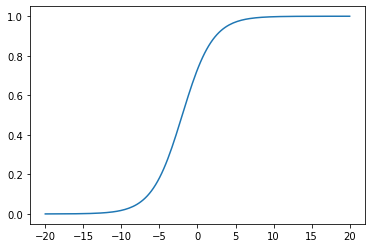

In [63]:
w=0.5 #@param {type: "slider", min: -0.9, max: 5, step: 0.1}
# slider is a google colab feature
b=1
X=np.linspace(-20,20,150) # This numpy function enables to generate evenly spaced values from -20 to +20 and 150 points are generated.
Y=sigmoid(X,w,b) # Note here that an numpy array is passed as X to sigmoid function. Output from sigmoid function is an array. This is where numpy array 
#broadcasting functionality is made use of 

#plot the sigmoid curve
plt.plot(X,Y)
plt.show()

# Note the changes. As 'w' becomes more and more lesser, slope increases 
# As b becomes more and more negative, sigmoid graph shifts right.
# if w becomes negative, the plot flips.

###### Let us visualize two dimensional Sigmoids with 3D Plotting 
###### since two dimensional values cannot be visualized in 2D Plots
##### Let us have two features X1 and X2. So with 2 features we will have two weights

So the sigmoid formula is 
$S_{w,b}(x1,x2)$=$\frac{1}{1+e^{-(w1x1+w2x2 +b)}}$


In [64]:
def sigmoid_2d (x1,x2,w1,w2,b):
  return (1/(1+np.exp(-(w1*x1+w2*x2+b))))

sigmoid_2d(0.5,0.6,0.2,0.3,1)

0.7824497764231124

##### let us define 2 arrays for X1 and X2.
######  let us use np.linspace function to generate set of evenly spaced values in a range 

In [65]:
X1=np.linspace(-20,20,150) # This numpy function enables to generate evenly spaced va
X2=np.linspace(-20,20,150) 

#The purpose of meshgrid is to create a rectangular grid out of an array of x values and an array of y values.
XX1,XX2 = np.meshgrid(X1,X2)
print(X1.shape,X2.shape,XX1.shape,XX2.shape)

(150,) (150,) (150, 150) (150, 150)


In [0]:
w3=0.6
w4 = 0.7
Y2D=sigmoid_2d(XX1,XX2,w3,w4,b)

##### Let us now draw a 3D plot
##### The code snippet for below is taken from https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

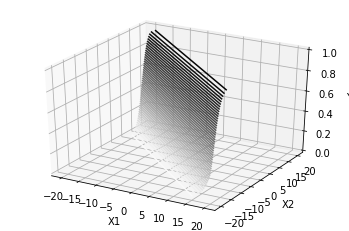

In [67]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(XX1, XX2, Y2D, 50, cmap='binary')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y');

###### Color is not good. 
###### Let us have more dense points

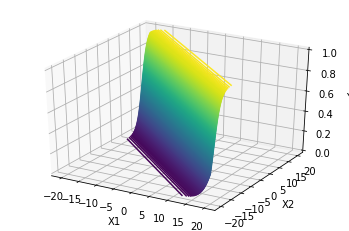

In [68]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(XX1, XX2, Y2D, 250, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y');

########Sometimes the default viewing angle is not optimal, in which case we can use the view_init method to set the elevation and azimuthal angles. In the following example, we'll use an elevation of 60 degrees (that is, 60 degrees above the x-y plane) and an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis):



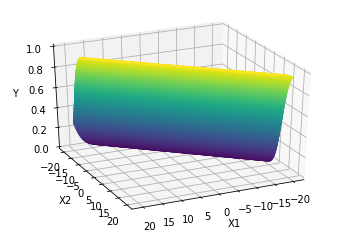

In [69]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(XX1, XX2, Y2D, 250, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y');
ax.view_init(30, 65) # change the azimuth and elevation angle, see the changes in orientation

#### Defining the loss function

In [0]:
def calculate_loss(X,Y,w_est,b_est):
    loss = 0
    for x,y in zip(X,Y):
        loss += y-sigmoid(x,w_est,b_est)**2.  # Mean Square Error Loss
    return loss

#### Generate a random value of w and b

In [0]:
ww = np.linspace(-1,1,100)
bb = np.linspace(-1,1,100)

WW,BB = np.meshgrid(ww,bb)

##### Class for Sigmoid Neuron

In [0]:
class SigmoidNeuron:

    def __init__(self,w,b):
        self.w=w
        self.b=b
    
    def perceptron(self,x):
        return np.dot(x,self.w.T)+self.b
    
    def sigmoid(self,x):
        return 1.0/(1.0+ np.exp(-x))
    
    def grad_w(self,x,y):
        y_pred=self.sigmoid(perceptron(x))
        grad_w= (y_pred-y)*y_pred*(1-y*pred)*x
    
    def grad_b(self,x,y):
        y_pred=self.sigmoid(perceptron(x))
        grad_w= (y_pred-y)*y_pred*(1-y*pred)
    
    def fit(self,X,Y,epochs=1,lr=1,intialize=True):

        if (intialize):
            w = np.random.randn(1,X.shape[1]) ## W is initialized. It contains the same row as number of columns in X
            self.b=0
        
        for i in range(epochs):
            dw=0
            db=0
            for x, y in zip(X,Y):
                dw = dw+self.grad_w(x,y)
                db = db+self.grad_b(x,y)
            self.w=self.w-lr*dw
            self.b=self.b-lr*db
